# 🐵 Recovered Cases Prediction

[Recovered Cases Prediction - Covid19 - India 🇮🇳 - Repo | officialpm](https://github.com/officialpm/Recovered-Cases-Prediction-Covid19-India)

####**`💚 Developed by`** [Parth Maniar](https://github.com/officialpm)

<div>
<a href="https://twitter.com/parthcodes">
  <img   align="left" alt="Parth | Twitter" width="22px"  src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/twitter.svg" />
</a>
<a href="https://www.linkedin.com/in/parthdmaniar/">
  <img align="left" alt="Parth's LinkdeIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />
</a>
<a href="https://t.me/parthmaniar">
  <img align="left" alt="Parth's Telegram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/telegram.svg" />
</a>
<a href="https://www.instagram.com/parthroxx/">
  <img align="left" alt="Parth's Instagram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/instagram.svg" />
</a>
</div>
<br/>


---

#Import Libraries

In [2]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
%matplotlib inline
from scipy.stats import *
import matplotlib.pyplot as plt  
import seaborn as sns 
import statsmodels.api as sm 
import datetime
from datetime import timedelta

sns.set_style('darkgrid')

#Import Data

In [3]:
#Importing data from API covid19india
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
train = pd.read_csv('http://api.covid19india.org/states_daily_csv/recovered.csv')

train['date'] = pd.to_datetime(train['date'], format="%d-%b-%y")

In [4]:
#Taking Totals only
train = train[['date','TT']]
train.tail()

,date,TT
155,2020-08-16,57404
156,2020-08-17,58172
157,2020-08-18,60455
158,2020-08-19,59365
159,2020-08-20,61873


In [5]:
train_df = train.copy()
train_df.tail()

,date,TT
155,2020-08-16,57404
156,2020-08-17,58172
157,2020-08-18,60455
158,2020-08-19,59365
159,2020-08-20,61873


In [6]:
#Total Recoveries Till Now
train_df['TT'].sum()

2157934

In [7]:
train_df = train_df.set_index('date')
train_df['TT'] = train_df['TT'].astype(float)
train_df.tail()

,TT
date,
2020-08-16,57404.0
2020-08-17,58172.0
2020-08-18,60455.0
2020-08-19,59365.0
2020-08-20,61873.0


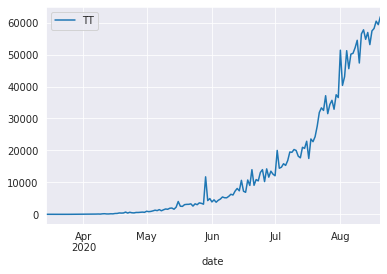

In [8]:
#Plotting Data
train_df.plot()

#Decomposing Data

<Figure size 432x288 with 0 Axes>

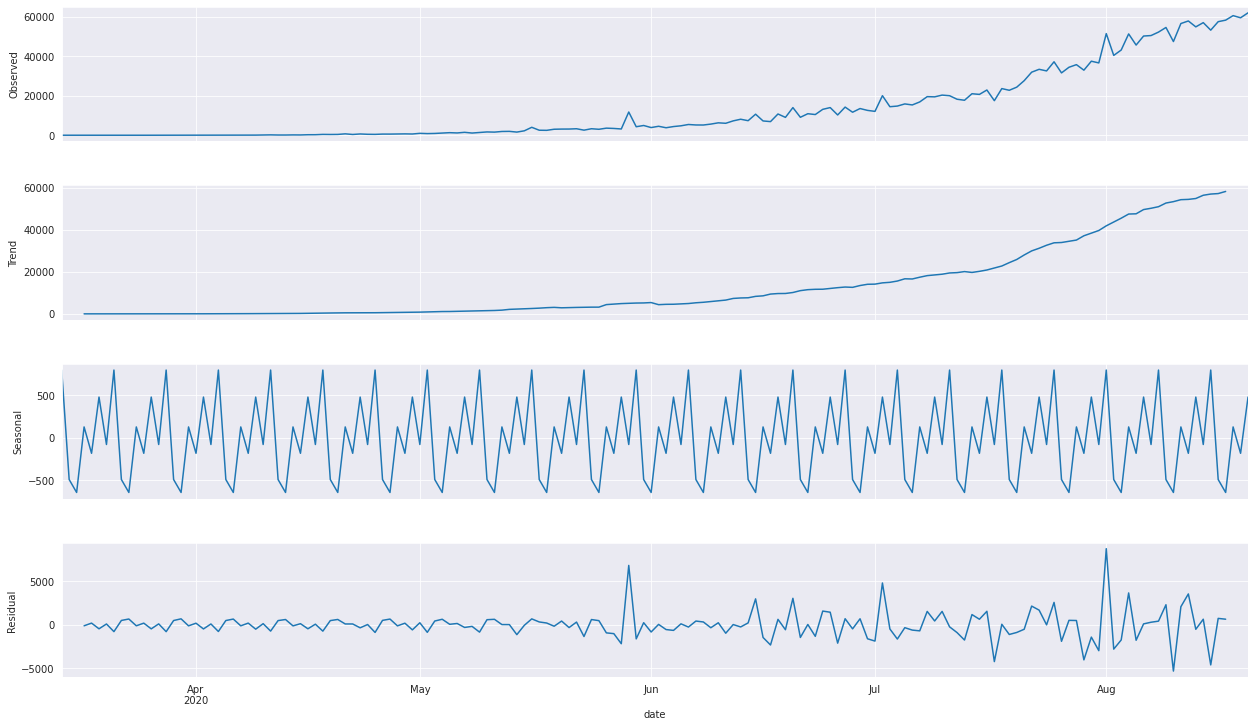

In [9]:
#Decomposing data
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(train_df['TT'], model='additive')
fig = plt.figure()  
fig = decompose.plot()  
fig.set_size_inches(20, 12)

#Test Data Stationarity

In [10]:
#Test Data Stationarity 
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller

def test_stationarity(timeseries, window = 15, cutoff = 0.01):
  rolmean = timeseries.rolling(window).mean()
  rolstd = timeseries.rolling(window).std()
  fig = plt.figure(figsize=(12, 8))
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC',)
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  pvalue = dftest[1]
  if pvalue < cutoff:
      print('p-value = %.4f. The series is likely stationary.' % pvalue)
  else:
      print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
  
  print(dfoutput)

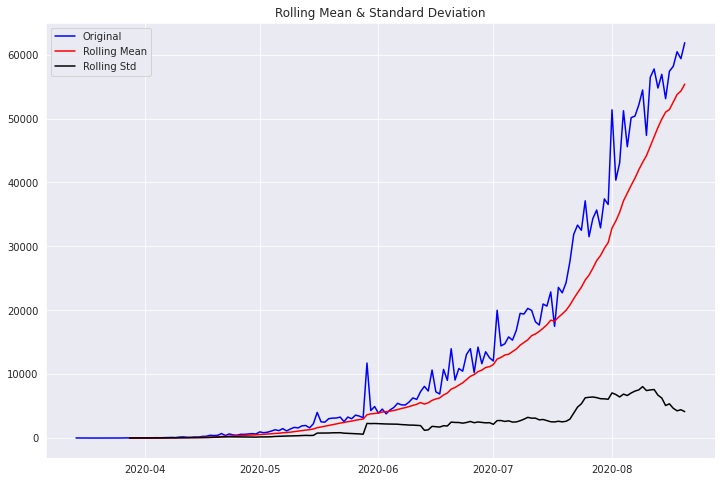

Results of Dickey-Fuller Test:
p-value = 1.0000. The series is likely non-stationary.
Test Statistic                   4.379539
p-value                          1.000000
#Lags Used                       6.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64


In [11]:
test_stationarity(train_df['TT'])

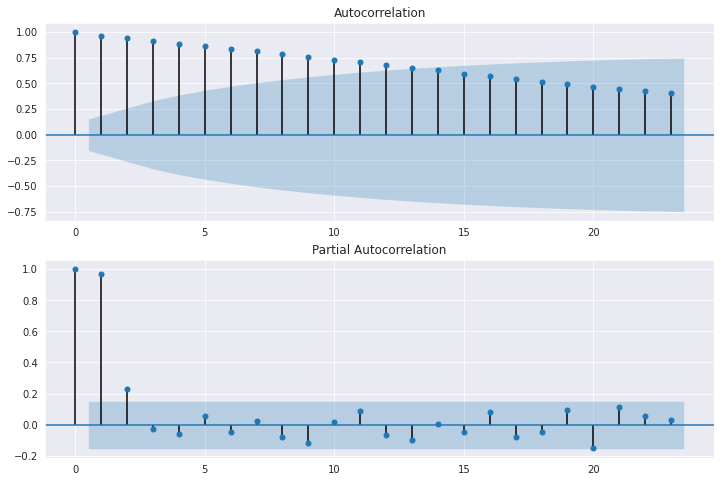

In [12]:
#autocorrelation and partial autocorrelation
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.TT, ax=ax1, ) # using default value of lag
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.TT, ax=ax2) # using default value of lag

#SARIMAX

In [13]:
#SARIMAX
#Order (14,1,0)
model = sm.tsa.statespace.SARIMAX(train_df[:-1].TT, trend='n', order=(14,1,0)).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                     TT   No. Observations:                  159
Model:              SARIMAX(14, 1, 0)   Log Likelihood               -1424.048
Date:                Thu, 20 Aug 2020   AIC                           2878.096
Time:                        20:52:06   BIC                           2924.035
Sample:                    03-14-2020   HQIC                          2896.753
                         - 08-19-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6891      0.083     -8.320      0.000      -0.851      -0.527
ar.L2         -0.3364      0.089     -3.769      0.000      -0.511      -0.161
ar.L3         -0.0449      0.081     -0.557      0.578      -0.203       0.113
ar.L4         -0.0372      0.092     -0.402      0.688      -0.218       0.144
ar.L5          0.1250      0.107      1.164      0.245      -0.086       0.336
ar.L6         -0.0783      0.095     -0.821      0.411      -0.265       0.109
ar.L7          0.1792      0.110      1.623      0.105      -0.037       0.396
ar.L8          0.2703      0.113      2.384      0.017       0.048       0.493
ar.L9          0.1260      0.109      1.159      0.247      -0.087       0.339
ar.L10         0.1699      0.095      1.796      0.073      -0.016       0.355
ar.L11         0.1526      0.078      1.962      0.050       0.000       0.305
ar.L12         0.2222      0.099      2.234      0.025       0.027       0.417
ar.L13         0.3086      0.099      3.104      0.002       0.114       0.503
ar.L14         0.3271      0.072      4.563      0.000       0.187       0.468
sigma2       4.22e+06   3.61e+05     11.676      0.000    3.51e+06    4.93e+06
===================================================================================
Ljung-Box (Q):                       28.75   Jarque-Bera (JB):               346.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):            1165.38   Skew:                             1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#PREDICTION

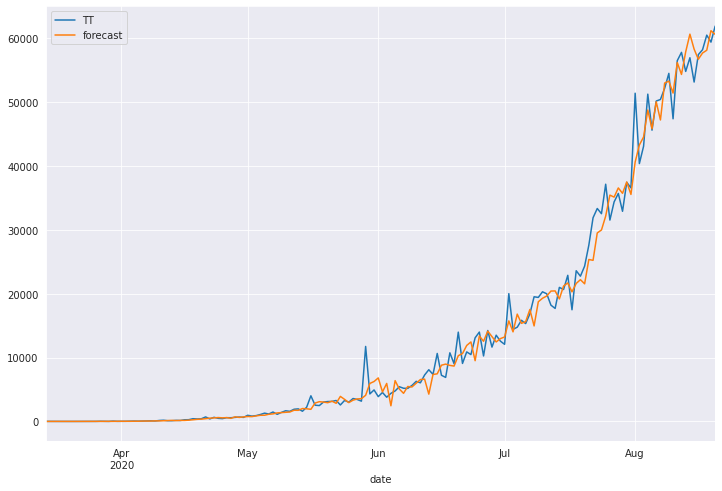

In [17]:
#Lets Predict
startD = '14-03-20'
endD = '20-08-20'
#adding forecasted values and plotting
train_df['forecast'] = model.predict(start= startD,end = endD,dynamic= False,)  

train_df[startD:][['TT', 'forecast']].plot(figsize=(12, 8))

#Predicting Next 20 Days

In [30]:
#Predicting Next 10 Days
future_predict = model.predict(start= datetime.date.today() ,end = datetime.date.today()+timedelta(days=20) ,dynamic= False)
future_predict = future_predict.round(0)

In [31]:
future_predict

2020-08-20    60577.0
2020-08-21    62153.0
2020-08-22    61228.0
2020-08-23    61840.0
2020-08-24    62795.0
2020-08-25    65703.0
2020-08-26    64134.0
2020-08-27    63768.0
2020-08-28    65989.0
2020-08-29    65441.0
2020-08-30    67680.0
2020-08-31    67198.0
2020-09-01    68415.0
2020-09-02    68920.0
2020-09-03    68668.0
2020-09-04    70065.0
2020-09-05    69616.0
2020-09-06    71010.0
2020-09-07    71747.0
2020-09-08    71668.0
2020-09-09    72146.0
Freq: D, dtype: float64

In [32]:
last = train_df['TT'].index[-1].strftime("%d-%m-%Y")
predlast = future_predict.index[-1].strftime("%d-%m-%Y")

In [33]:
expected = train_df['TT'].sum() + future_predict[1:].sum()
expected

3498118.0

In [34]:
#Joining Graph
future_predict[0]=train_df['TT'].iloc[-1]

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter( x=train_df['TT'].index, y=train_df['TT'], name = "Actual"))
fig.add_trace(go.Scatter( x=future_predict.index, y=future_predict.values, name = "Predicted",mode='markers', texttemplate='%{text:.0f}',
                         textposition='top left',line=dict(color="limegreen")
))


fig.update_traces(mode="lines", hovertemplate=None)
fig.update_layout(hovermode="x")
fig.update_layout(
    title={
      'text': f"Recovered Cases Prediction <b>Covid-19 🇮🇳 INDIA </b><br>Total Recovered till {last} : {train_df['TT'][:-1].sum():.0f}<br><b>Expected Total Recoverings by {predlast} :<b style='color:limegreen'> {expected:.0f}</b></b> ",
      'y':0.94,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'},
  xaxis_title="Date",
  yaxis_title="Recoverings",
  hoverlabel=dict(
         font=dict(
      family="Lato",
      size=15,
      color="white"),
      bgcolor = "#000000",
        font_size=15, 
        font_family="Rockwell"
    ),
  font=dict(
      family="Lato",
      size=18,
      color="#7f7f7f"
  ))
fig.show()